In [2]:
import pandas as pd
df = pd.read_csv('Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [3]:
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

In [4]:
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


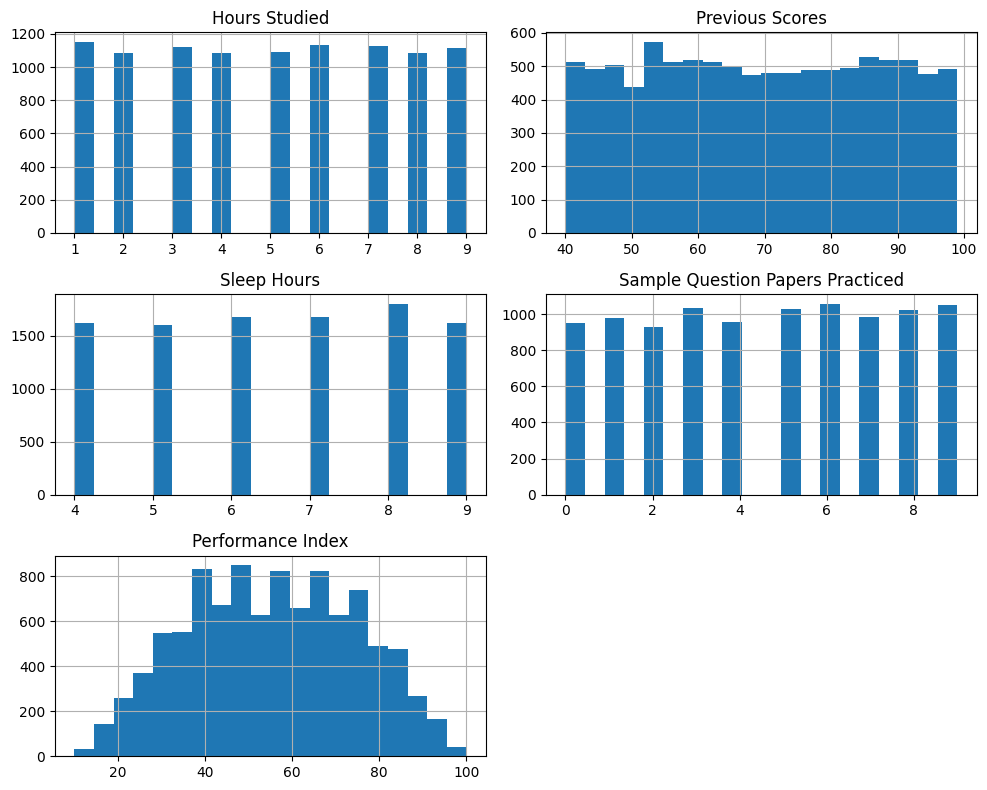

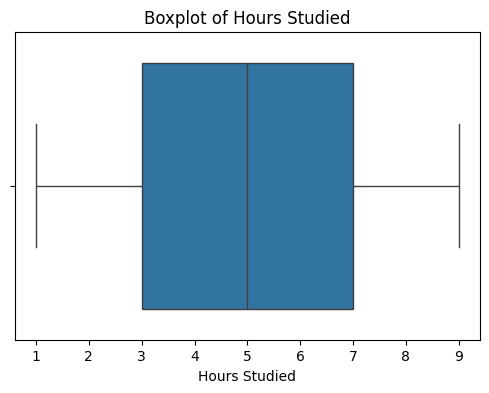

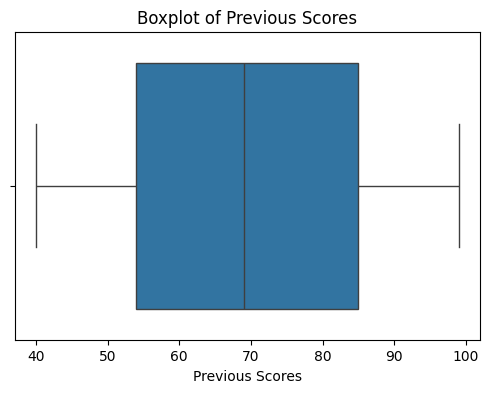

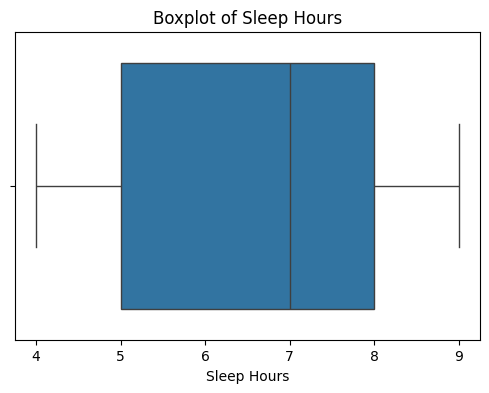

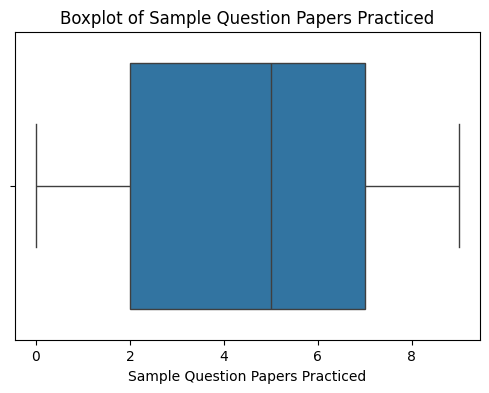

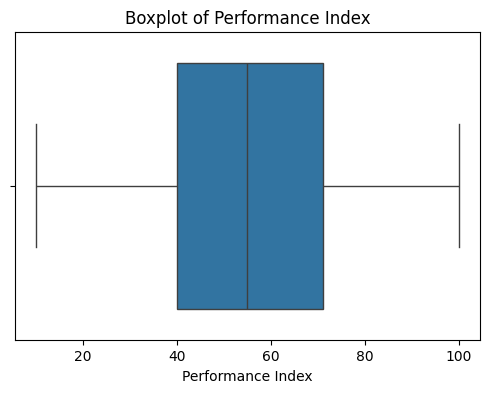

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
df[numeric_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


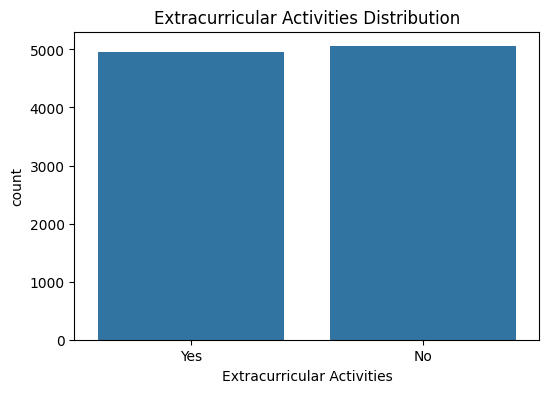

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Extracurricular Activities', data=df)
plt.title('Extracurricular Activities Distribution')
plt.show()


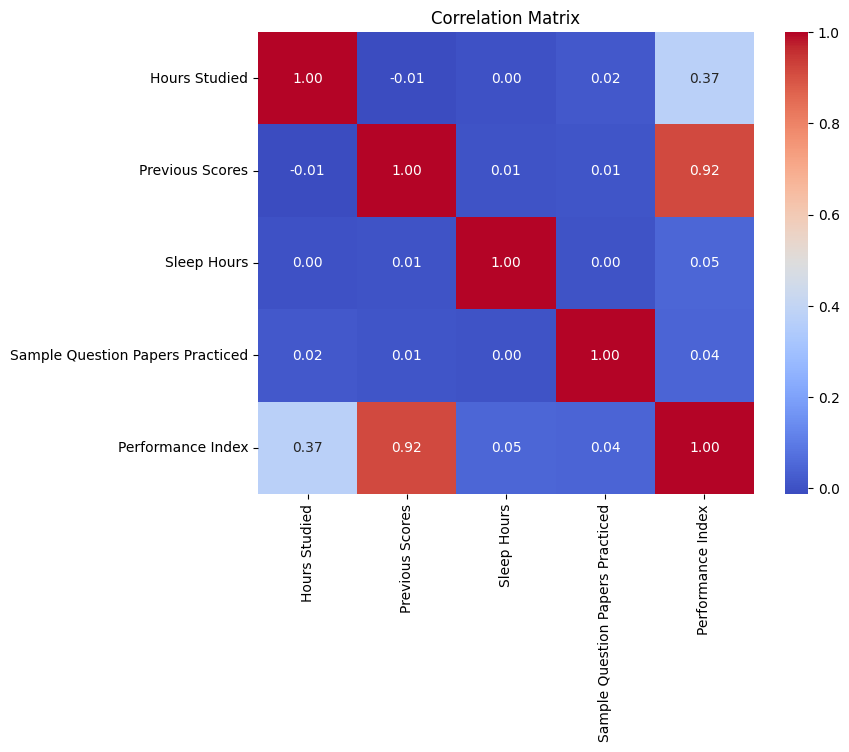

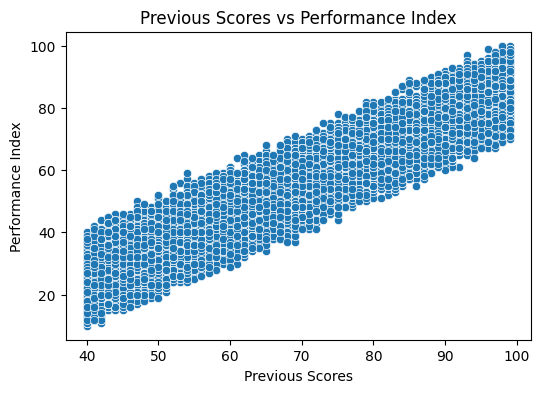

In [9]:
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Previous Scores'], y=df['Performance Index'])
plt.title('Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 4.082628398521853
R-squared: 0.9889832909573145


In [12]:
import numpy as np
X_manual = np.c_[np.ones(X.shape[0]), X]

y_manual = y.values

X_transpose = X_manual.T
X_transpose_dot_X = X_transpose.dot(X_manual)

X_transpose_dot_X_inv = np.linalg.inv(X_transpose_dot_X)

X_transpose_dot_y = X_transpose.dot(y_manual)

theta = X_transpose_dot_X_inv.dot(X_transpose_dot_y)

print("Coefficients (theta):", theta)

intercept = theta[0]
coefficients = theta[1:]

print(f"Intercept (alpha): {intercept}")
print(f"Coefficients: {coefficients}")

y_pred_manual = X_manual.dot(theta)

Coefficients (theta): [-34.07558809   2.85298205   1.01843419   0.61289758   0.48055975
   0.19380214]
Intercept (alpha): -34.075588091913346
Coefficients: [2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]


In [13]:
residuals = y_manual - y_pred_manual

mse = np.mean(residuals ** 2)
print(f"Mean Squared Error: {mse}")

ss_total = np.sum((y_manual - np.mean(y_manual)) ** 2)
ss_residual = np.sum(residuals ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared}")

Mean Squared Error: 4.151350633946037
R-squared: 0.9887523323780958
